In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, mean
from scipy.stats import skew, kurtosis
from tabulate import tabulate
import pywt
from skimage.restoration import denoise_wavelet
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_dir = r"C:\Users\a\Desktop\Road 2 20\PreML\fig_data"
data = pd.read_csv(f"{data_dir}\\testSeasonal1.csv")

data.head(),data.tail()

(             Timestamp       Data
 0  2008-11-11 15:00:00  67.769126
 1  2008-11-11 15:15:00  66.952808
 2  2008-11-11 15:30:00  65.021858
 3  2008-11-11 15:45:00  65.782704
 4  2008-11-11 16:00:00  67.198002,
                Timestamp       Data
 995  2008-11-21 23:45:00  66.099529
 996  2008-11-22 00:00:00  66.293064
 997  2008-11-22 00:15:00  73.192753
 998  2008-11-22 00:30:00  70.953391
 999  2008-11-22 00:45:00  68.499506)

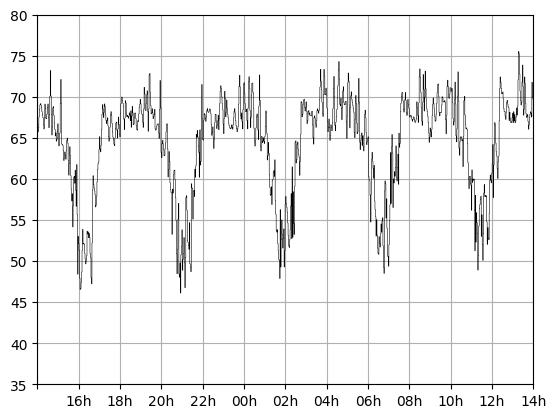

In [3]:
better_data = denoise_wavelet(data['Data'].to_numpy(),method = 'BayesShrink', mode = 'soft', wavelet_levels = 3, wavelet = 'sym8', rescale_sigma=True)

plt.step(np.linspace(0, 1.2, len(data['Data'])), better_data,color='black', linewidth=0.4)
plt.ylim(35,80)
plt.xlim(0, 1)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2],["","16h","18h","20h","22h","00h","02h","04h","06h","08h","10h","12h","14h"])

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)

In [4]:
df = pd.DataFrame(better_data,columns = ["data"])
sets = len(df)/9
train = df.iloc[:int(sets*8)]
test = df.iloc[int(sets*8):]

train,test



(          data
 0    67.644754
 1    66.725431
 2    65.723054
 3    66.244089
 4    67.546789
 ..         ...
 883  58.009090
 884  52.317485
 885  55.895932
 886  54.702129
 887  53.345025
 
 [888 rows x 1 columns],
           data
 888  48.900975
 889  50.688124
 890  54.259314
 891  56.370659
 892  56.883505
 ..         ...
 995  68.017892
 996  67.537852
 997  71.770130
 998  69.981810
 999  69.770853
 
 [112 rows x 1 columns])

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

scaled_train[:10]

array([[0.76405665],
       [0.73144265],
       [0.69588224],
       [0.71436654],
       [0.76058122],
       [0.79392991],
       [0.81304669],
       [0.81822729],
       [0.81191506],
       [0.80029101]])

In [6]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

n_input = 3
n_features = 1
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
X.shape

Given the Array: 
[0.76405665 0.73144265 0.69588224]
Predict this y: 
 [[0.71436654]]


(1, 3, 1)

In [7]:
n_input = 160
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [8]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
X.shape

Given the Array: 
[0.76405665 0.73144265 0.69588224 0.71436654 0.76058122 0.79392991
 0.81304669 0.81822729 0.81191506 0.80029101 0.78351341 0.76932106
 0.75726748 0.7273575  0.70869196 0.75712731 0.81601052 0.79788925
 0.75391629 0.75289071 0.77229642 0.80195384 0.81657902 0.75985264
 0.7141231  0.77171268 0.84987422 0.96140083 0.85165788 0.77030481
 0.68257509 0.7194797  0.79999349 0.8057176  0.7670809  0.73464241
 0.70698692 0.67861625 0.69179474 0.65584864 0.66321308 0.6972224
 0.7311224  0.68813139 0.63593925 0.6394747  0.69125796 0.81960056
 0.9223907  0.82094645 0.64292502 0.64197277 0.6372935  0.6152184
 0.57256781 0.58292499 0.60922082 0.59468258 0.5779724  0.61430382
 0.65926434 0.66910731 0.64730404 0.57377454 0.50915411 0.55848607
 0.63185693 0.59388713 0.50713888 0.44936092 0.39777211 0.42928567
 0.28558992 0.37700795 0.4985062  0.50455205 0.4740983  0.5307082
 0.44337033 0.37493496]
Predict this y: 
 [[0.55510521]]


(1, 80, 1)

In [10]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

In [11]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(generator,epochs=40)

Epoch 1/40
 10/808 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.4221

C:\Users\a\Desktop\Road 2 20\PreML\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


808/808 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0446
Epoch 2/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0103
Epoch 3/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0080
Epoch 4/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0081
Epoch 5/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0069
Epoch 6/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0060
Epoch 7/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0059
Epoch 8/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 0.0056
Epoch 9/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0054
Epoch 10/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0056
Epoch 11/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0054
Epoch 12/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0046
Epoch 13/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0053
Epoch 14/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0048
Epoch 15/40
808/808 ━━━━━━━━━━━━━━━━━━━━ 

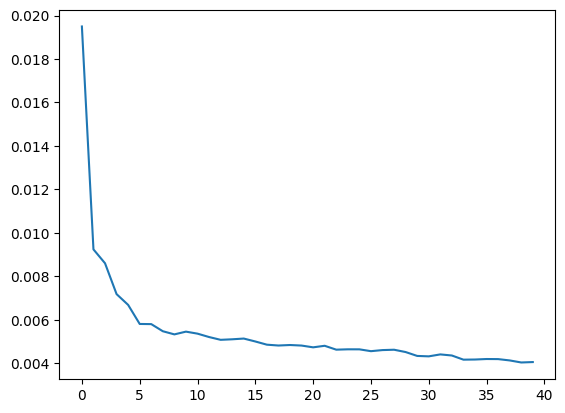

In [13]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [14]:
last_train_batch = scaled_train[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[0.23531576]], dtype=float32)

In [15]:
scaled_test[0]


array([0.09910076])

In [16]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [17]:
test_predictions



[array([0.23531576], dtype=float32),
 array([0.21452937], dtype=float32),
 array([0.20028484], dtype=float32),
 array([0.19631574], dtype=float32),
 array([0.20446199], dtype=float32),
 array([0.2216606], dtype=float32),
 array([0.24022149], dtype=float32),
 array([0.25350985], dtype=float32),
 array([0.25974447], dtype=float32),
 array([0.2582062], dtype=float32),
 array([0.25296175], dtype=float32),
 array([0.25185], dtype=float32),
 array([0.25737625], dtype=float32),
 array([0.2671784], dtype=float32),
 array([0.2774964], dtype=float32),
 array([0.2834748], dtype=float32),
 array([0.28437674], dtype=float32),
 array([0.28452215], dtype=float32),
 array([0.28770152], dtype=float32),
 array([0.29556236], dtype=float32),
 array([0.30769128], dtype=float32),
 array([0.32308206], dtype=float32),
 array([0.34131092], dtype=float32),
 array([0.36291474], dtype=float32),
 array([0.38856232], dtype=float32),
 array([0.41801655], dtype=float32),
 array([0.45154917], dtype=float32),
 array([0

In [18]:
test = test.reset_index(drop=True)
test.head()


,data
0,48.900975
1,50.688124
2,54.259314
3,56.370659
4,56.883505


In [19]:
true_predictions = scaler.inverse_transform(test_predictions)



,data,trained
0,48.900975,52.740603
1,50.688124,52.154677
2,54.259314,51.753152
3,56.370659,51.641271
4,56.883505,51.870897
...,...,...
107,68.017892,69.695207
108,67.537852,69.698372
109,71.770130,69.701425
110,69.981810,69.704367


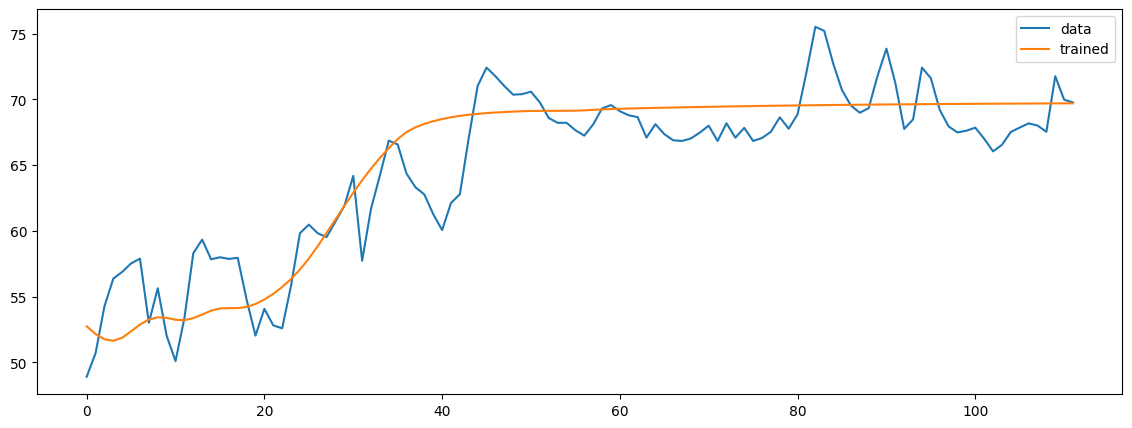

In [20]:
preds = pd.DataFrame(true_predictions)
test['trained'] = preds


test.plot(figsize=(14,5))
test
# plt.ylim(60,90)
# plt.xlim(510, 700)
# plt.show
# preds.plot(figsize=(14,5))

# plt.ylim(60,90)
# plt.xlim(0, 175)
# plt.show()


# frames = [test,preds]
# results = pd.concat(frames,axis=1, )
# display(results)